<a href="https://colab.research.google.com/github/Manar-Emad75/NLP_Project/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import nltk
import os
import re
import pickle
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
zip_file_path = '/content/pos.zip'
extracted_folder_path = '/content/extracted_folder'
os.makedirs(extracted_folder_path, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


zip_file_path = '/content/neg.zip'
extracted_folder_path = '/content/extracted_folder'
os.makedirs(extracted_folder_path, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

folderNeg_path = '/content/extracted_folder/neg'
folderPos_path = '/content/extracted_folder/pos'

#Read text files and put them in list

In [ ]:
def read_text_files(folder_path):
    texts = []
    files = os.listdir(folder_path)
    for file_name in files:
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as f:
                text = f.read()
                texts.append(text)
    return texts

In [ ]:
texts_folderNeg = read_text_files(folderNeg_path)
texts_folderPos = read_text_files(folderPos_path)

# access spacifice file in list
neg_file = texts_folderNeg[20]

In [ ]:
def preprocess_text(text):

    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # tokenization and Removing stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    # print(lemmatized_text)

    # Joining the lemmatized text back into a single string
    processed_text = ' '.join(lemmatized_text)

    return processed_text

#Load data as train(X) and test(Y)

In [ ]:
def load_data(folder):
    reviews = []
    labels = []
    for file in os.listdir(folder):
        with open(os.path.join(folder, file), 'r', encoding='utf-8') as f:
            review = f.read()
            processed_review = preprocess_text(review)
            reviews.append(processed_review)
            labels.append(folder.split('/')[-1])  # Extract label from folder name
    return reviews, labels

In [ ]:
positive_reviews, positive_labels = load_data(folderPos_path)
negative_reviews, negative_labels = load_data(folderNeg_path)

#Combine all positive and negative file to train model

In [ ]:
# Combine positive and negative reviews and labels
all_reviews = positive_reviews + negative_reviews
all_labels = positive_labels + negative_labels

#Apply TF-IDF

In [ ]:
# Feature Extraction TF-IDF
vectorizer = TfidfVectorizer()

#define train and test
X = vectorizer.fit_transform(all_reviews)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(X, f)

y = all_labels
# print(X)

# Data Spliting

In [ ]:
# Model Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Classifier

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

with open('logistic_regression.pkl', 'wb') as f:
    pickle.dump(classifier.fit(X_train, y_train), f)

# Predict the labels of the test data
y_pred_train_logistic = classifier.predict(X_train)
y_pred_test_logistic = classifier.predict(X_test)

train_accuracy_logistic = accuracy_score(y_train, y_pred_train_logistic)
test_accuracy_logisitc = accuracy_score(y_test, y_pred_test_logistic)


# Print accuracies
print("Logistic Regression:")
print("Accuracy of train = {:.2f}%".format(train_accuracy_logistic * 100))
print("Accuracy of test = {:.2f}%".format(test_accuracy_logisitc * 100))


# Classification report for train and test data
print("\nClassification Report for Logistic Regression - Train Data:")
print(classification_report(y_train, y_pred_train_logistic))
print("\nClassification Report for Logistic Regression - Test Data:")
print(classification_report(y_test, y_pred_test_logistic))

Logistic Regression:
Accuracy of train = 97.56%
Accuracy of test = 84.75%

Classification Report for Logistic Regression - Train Data:
              precision    recall  f1-score   support

         neg       0.97      0.98      0.98       799
         pos       0.98      0.97      0.98       801

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


Classification Report for Logistic Regression - Test Data:
              precision    recall  f1-score   support

         neg       0.87      0.82      0.84       201
         pos       0.83      0.87      0.85       199

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



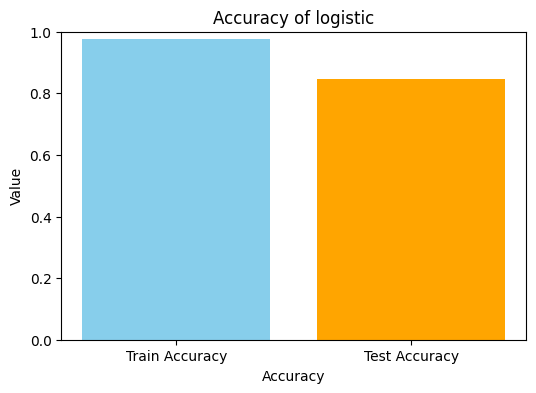

In [ ]:
# Plot accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy_logistic, test_accuracy_logisitc], color=['skyblue', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Value')
plt.title(f'Accuracy of logistic')
plt.ylim(0, 1)
plt.show()

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

with open('logistic_regression.pkl', 'wb') as f:
    pickle.dump(svm_classifier.fit(X_train, y_train), f)
# Predict the labels of the test data
y_pred_test_svm = svm_classifier.predict(X_test)
y_pred_train_svm=svm_classifier.predict(X_train)

# Calculate accuracies
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)


# Print accuracies
print("\nSVM:")
print("Accuracy of train = {:.2f}%".format(train_accuracy_svm * 100))
print("Accuracy of test = {:.2f}%".format(test_accuracy_svm * 100))

# Classification report for train and test data
print("\nClassification Report for SVM - Train Data:")
print(classification_report(y_train, y_pred_train_svm))
print("\nClassification Report for SVM - Test Data:")
print(classification_report(y_test, y_pred_test_svm))



SVM:
Accuracy of train = 99.38%
Accuracy of test = 86.00%

Classification Report for SVM - Train Data:
              precision    recall  f1-score   support

         neg       0.99      0.99      0.99       799
         pos       0.99      0.99      0.99       801

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600


Classification Report for SVM - Test Data:
              precision    recall  f1-score   support

         neg       0.89      0.83      0.86       201
         pos       0.84      0.89      0.86       199

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



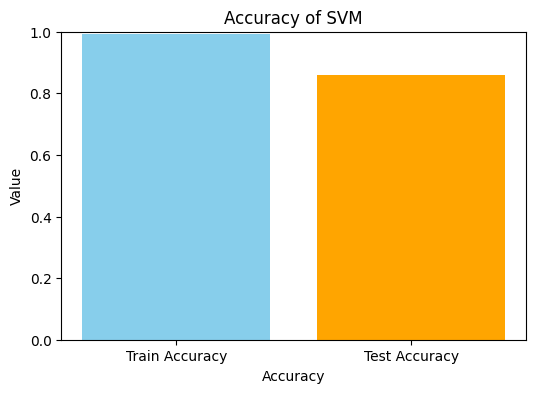

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy_svm, test_accuracy_svm], color=['skyblue', 'orange'])
plt.xlabel('Accuracy')
plt.ylabel('Value')
plt.title(f'Accuracy of SVM')
plt.ylim(0, 1)
plt.show()

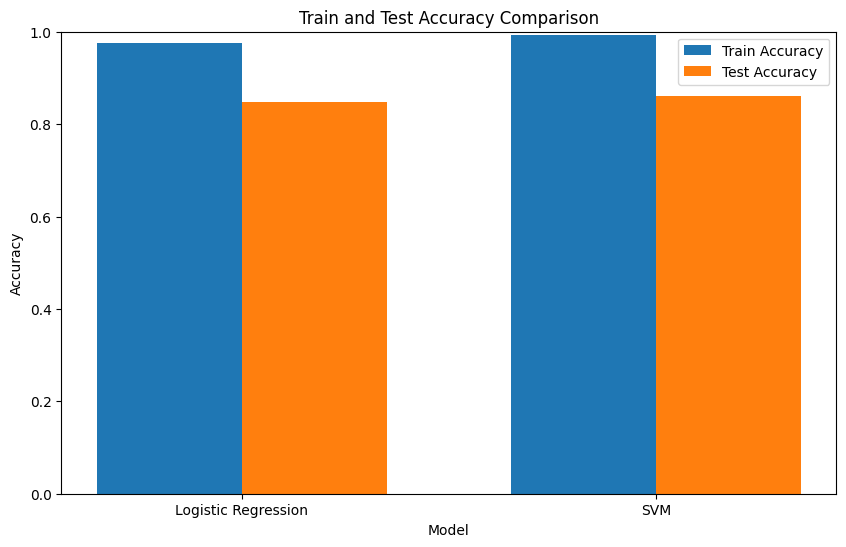

In [ ]:
# Plotting accuracies of both models
plt.figure(figsize=(10, 6))

# Bar positions
bar_positions = [0.4, 1.4]
bar_width = 0.35

# Train accuracies
plt.bar([pos - bar_width/2 for pos in bar_positions], [train_accuracy_logistic, train_accuracy_svm], bar_width, label='Train Accuracy')

# Test accuracies
plt.bar([pos + bar_width/2 for pos in bar_positions], [test_accuracy_logisitc, test_accuracy_svm], bar_width, label='Test Accuracy')

# X-axis labels
plt.xticks(bar_positions, ['Logistic Regression', 'SVM'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Comparison')
plt.legend()
plt.ylim(0, 1)
plt.show()

#func to colored output

In [ ]:
from IPython.display import display, HTML

# Define HTML for displaying text in specified color and style
def colored_text(text, color='black', style='normal'):
    color_code = {'black': 'black', 'red': 'red', 'green': 'green'}
    style_code = {'normal': 'normal', 'bold': 'bold'}

    return f"<span style='color:{color_code[color]}; font-weight:{style_code[style]}'>{text}</span>"

#Define if file is positive or negative

In [ ]:
# aplay pre-processing to file
processed_review = preprocess_text(neg_file)

# Transform the preprocessed review into a TF-IDF vector
review_vector = vectorizer.transform([processed_review])

# Classify the sentiment using the trained classifier in LogisticRegression
sentiment = classifier.predict(review_vector)[0]
# sentiment = svm_classifier.predict(review_vector)[0]

if sentiment == 'neg':
    display(HTML(colored_text('Negative Review', color='red', style='bold')))
else:
    display(HTML(colored_text('Positive Review', color='green', style='bold')))

#Saving the model

In [ ]:
import joblib
import matplotlib.pyplot as plt
model_filename = 'sentiment_classifier_model.pkl'
joblib.dump(classifier, model_filename)

# Check if the model file exists
if os.path.exists(model_filename):
    print("Model has been saved successfully.")
else:
    print("Model could not be saved. Please check the file path.")

Model has been saved successfully.


In [90]:
import joblib
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the saved model
model_filename = 'sentiment_classifier_model.pkl'
classifier = joblib.load(model_filename)

# Get user input
user_review = input("Enter your review: ")

# Preprocess the user-input review
processed_review = preprocess_text(user_review)

# Transform the preprocessed review into a TF-IDF vector
review_vector = vectorizer.transform([processed_review])

# Predict the sentiment of the user-input review
sentiment = classifier.predict(review_vector)[0]

# Display the result to the user
if sentiment == 'neg':
    print("The review is Negative.")
else:
    print("The review is Positive.")


Enter your review: bad film
The review is Negative.


In [ ]:
#import pickle

# Save classifier and vectorizer
#with open('classifier.pkl', 'wb') as f:
#    pickle.dump(classifier, f)

#with open('vectorizer.pkl', 'wb') as f:
#    pickle.dump(vectorizer, f)

# Load classifier and vectorizer
#with open('classifier.pkl', 'rb') as f:
#    classifier = pickle.load(f)

#with open('vectorizer.pkl', 'rb') as f:
#    vectorizer = pickle.load(f)

# Now you can use the loaded classifier and vectorizer to predict the sentiment of new reviews
